# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="+ city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | nepalgunj
Processing Record 3 of Set 1 | palmer
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | nemuro
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | tago
Processing Record 8 of Set 1 | howrah
Processing Record 9 of Set 1 | vilyuchinsk
Processing Record 10 of Set 1 | salahonda
Processing Record 11 of Set 1 | swakopmund
Processing Record 12 of Set 1 | altai
Processing Record 13 of Set 1 | sechura
Processing Record 14 of Set 1 | yuzhno-kurilsk
Processing Record 15 of Set 1 | kosh-agach
Processing Record 16 of Set 1 | fort irwin
Processing Record 17 of Set 1 | laranjal paulista
Processing Record 18 of Set 1 | hadibu
Processing Record 19 of Set 1 | saint croix
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 | longyearbyen
Processing Record 23 o

Processing Record 38 of Set 4 | i-n-salah
Processing Record 39 of Set 4 | yangon
Processing Record 40 of Set 4 | egilsstadir
Processing Record 41 of Set 4 | san jose de jachal
Processing Record 42 of Set 4 | neem ka thana
Processing Record 43 of Set 4 | ust'-kut
Processing Record 44 of Set 4 | yellowknife
Processing Record 45 of Set 4 | fallon
Processing Record 46 of Set 4 | kataragama
City not found. Skipping...
Processing Record 47 of Set 4 | pacific grove
Processing Record 48 of Set 4 | fale old settlement
Processing Record 49 of Set 4 | humaita
Processing Record 0 of Set 5 | richards bay
Processing Record 1 of Set 5 | belo sur tsiribihina
Processing Record 2 of Set 5 | tashla
Processing Record 3 of Set 5 | kristinestad
Processing Record 4 of Set 5 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | iskateley
Processing Record 7 of Set 5 | afaahiti
Processing Record 8 of Set 5 | griffith
Processing Record 9 of Set 5 | juan gr

Processing Record 29 of Set 8 | nabire
Processing Record 30 of Set 8 | el calafate
Processing Record 31 of Set 8 | srbica
Processing Record 32 of Set 8 | leticia
Processing Record 33 of Set 8 | bembereke
Processing Record 34 of Set 8 | tangalle
Processing Record 35 of Set 8 | nadi
Processing Record 36 of Set 8 | tommot
Processing Record 37 of Set 8 | derzhavinsk
Processing Record 38 of Set 8 | zanzibar
Processing Record 39 of Set 8 | ta`u
Processing Record 40 of Set 8 | harstad
Processing Record 41 of Set 8 | mugango
Processing Record 42 of Set 8 | mil'kovo
Processing Record 43 of Set 8 | antsiranana
Processing Record 44 of Set 8 | las khorey
Processing Record 45 of Set 8 | luanco
Processing Record 46 of Set 8 | yoichi
Processing Record 47 of Set 8 | proddatur
Processing Record 48 of Set 8 | saint-francois
Processing Record 49 of Set 8 | tazovsky
Processing Record 0 of Set 9 | marka
Processing Record 1 of Set 9 | olinda
Processing Record 2 of Set 9 | joshimath
Processing Record 3 of Se

Processing Record 16 of Set 12 | sonsorol village
City not found. Skipping...
Processing Record 17 of Set 12 | nishinoomote
Processing Record 18 of Set 12 | pedernales
Processing Record 19 of Set 12 | ierapetra
Processing Record 20 of Set 12 | brindisi
Processing Record 21 of Set 12 | keetmanshoop
Processing Record 22 of Set 12 | selfoss
Processing Record 23 of Set 12 | xining
Processing Record 24 of Set 12 | javea
Processing Record 25 of Set 12 | priob'ye
Processing Record 26 of Set 12 | singkil
Processing Record 27 of Set 12 | baldeogarh
Processing Record 28 of Set 12 | makoua
Processing Record 29 of Set 12 | susanville
Processing Record 30 of Set 12 | postmasburg
City not found. Skipping...
Processing Record 31 of Set 12 | undurkhaan
Processing Record 32 of Set 12 | kavaratti
Processing Record 33 of Set 12 | ilek
Processing Record 34 of Set 12 | ottawa
Processing Record 35 of Set 12 | vernon
Processing Record 36 of Set 12 | kunszentmiklos
Processing Record 37 of Set 12 | strathmore


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,12.12,97,100,2.24,NZ,1692049817
1,nepalgunj,28.0500,81.6167,24.59,82,100,1.64,NP,1692049818
2,palmer,42.1584,-72.3287,28.06,62,75,3.09,US,1692049818
3,adamstown,-25.0660,-130.1015,21.06,84,99,10.62,PN,1692049818
4,nemuro,43.3236,145.5750,15.36,93,100,6.56,JP,1692049818


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,97,100,2.24,NZ,1692049817
1,nepalgunj,28.0500,81.6167,24.59,82,100,1.64,NP,1692049818
2,palmer,42.1584,-72.3287,28.06,62,75,3.09,US,1692049818
3,adamstown,-25.0660,-130.1015,21.06,84,99,10.62,PN,1692049818
4,nemuro,43.3236,145.5750,15.36,93,100,6.56,JP,1692049818


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

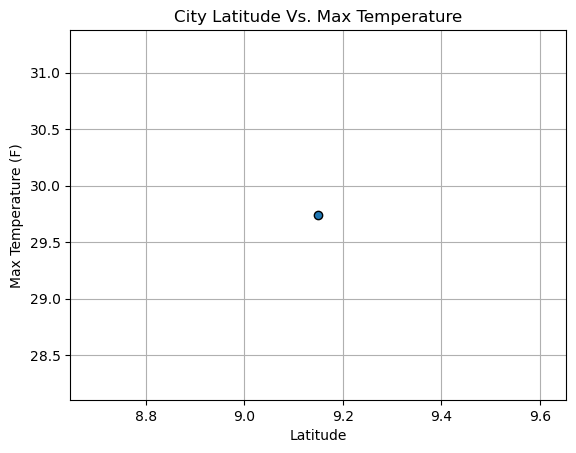

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_lat,city_max_temp, 
            edgecolor="black", linewidth=1,label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

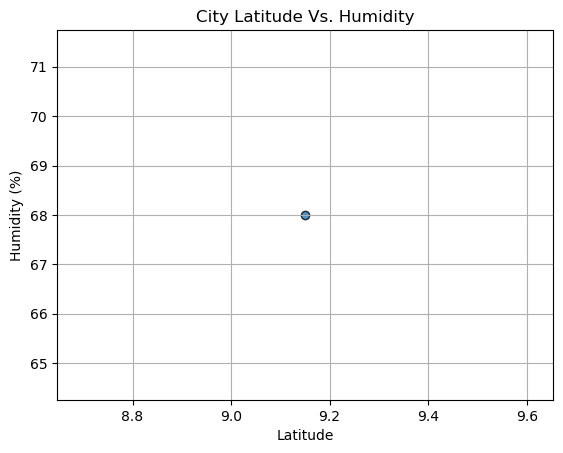

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_lat,city_humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity" )
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

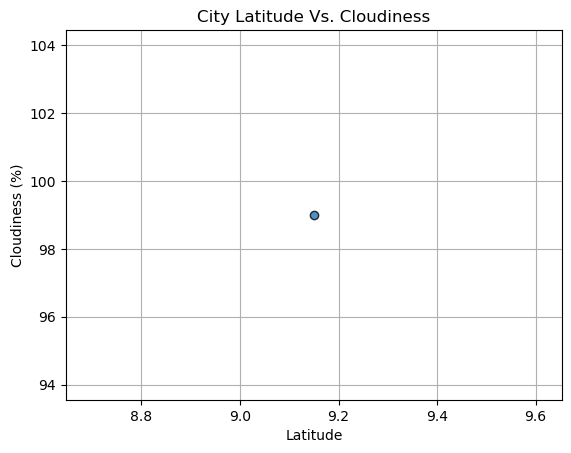

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_lat,city_clouds,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness" )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

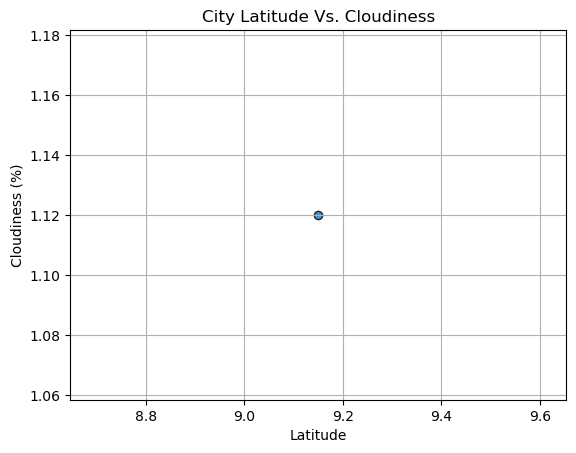

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_lat,city_wind,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness" )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def Linear_Regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel("Latitude")
    plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
north_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nepalgunj,28.0500,81.6167,24.59,82,100,1.64,NP,1692049818
2,palmer,42.1584,-72.3287,28.06,62,75,3.09,US,1692049818
4,nemuro,43.3236,145.5750,15.36,93,100,6.56,JP,1692049818
5,bethel,41.3712,-73.4140,28.06,69,0,1.54,US,1692049819
6,tago,9.0211,126.2317,25.08,89,100,1.44,PH,1692049819


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,12.12,97,100,2.24,NZ,1692049817
3,adamstown,-25.0660,-130.1015,21.06,84,99,10.62,PN,1692049818
10,swakopmund,-22.6833,14.5333,12.21,83,97,0.45,NaN,1692049820
12,sechura,-5.5569,-80.8222,25.80,64,91,7.18,PE,1692049820
16,laranjal paulista,-23.0497,-47.8367,17.06,84,94,5.28,BR,1692049821


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.6224390835470925


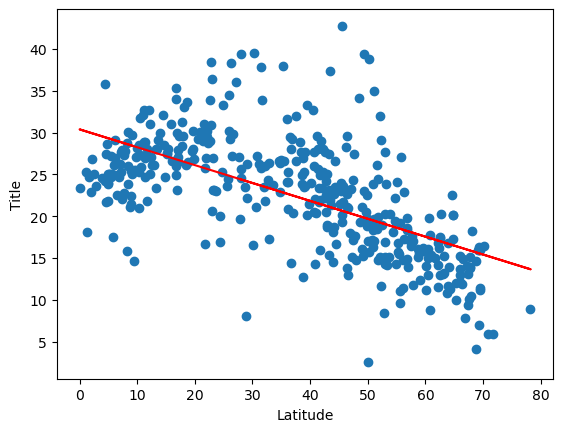

In [18]:
# Linear regression on Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Max Temp"]
Linear_Regression(x_values,y_values, 'Max Temp', (6,30))

The r-squared is: 0.8502865795707036


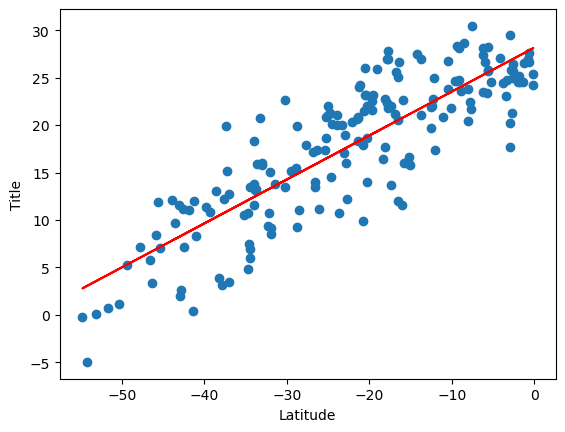

In [19]:
# Linear regression on Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Max Temp"]
Linear_Regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: -0.05696235641827547


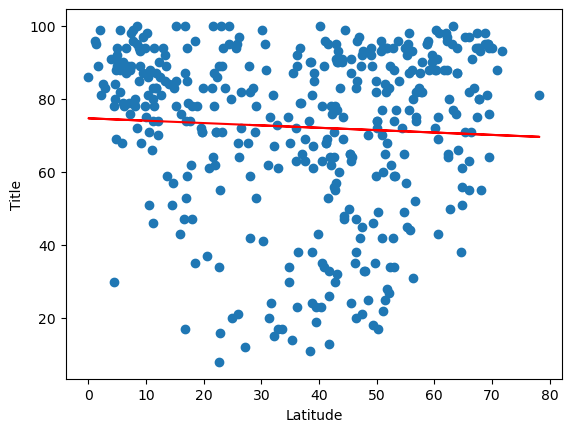

In [20]:
# Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Humidity"]
Linear_Regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: -0.07881389589441995


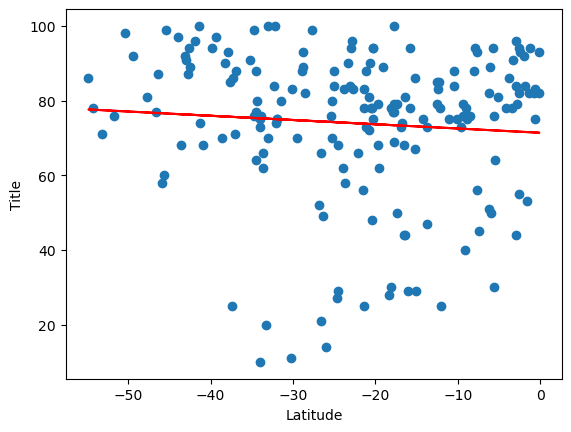

In [21]:
# Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Humidity"]
Linear_Regression(x_values,y_values, 'Humidity', (-30,150))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.025945638737871153


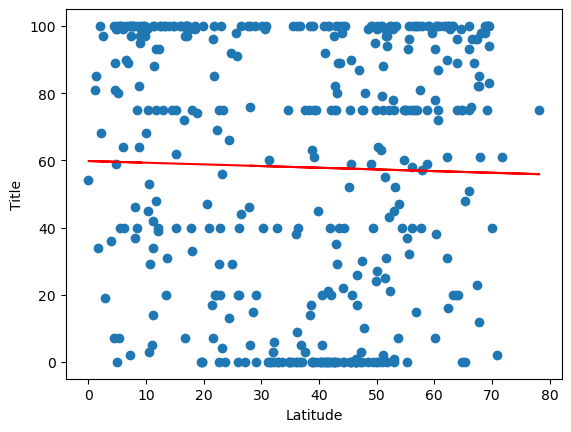

In [22]:
# Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Cloudiness"]
Linear_Regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: -0.009917102949413134


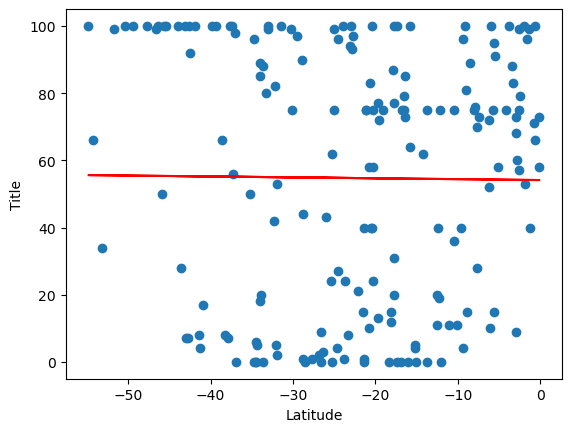

In [23]:
# Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Cloudiness"]
Linear_Regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.17590133029561503


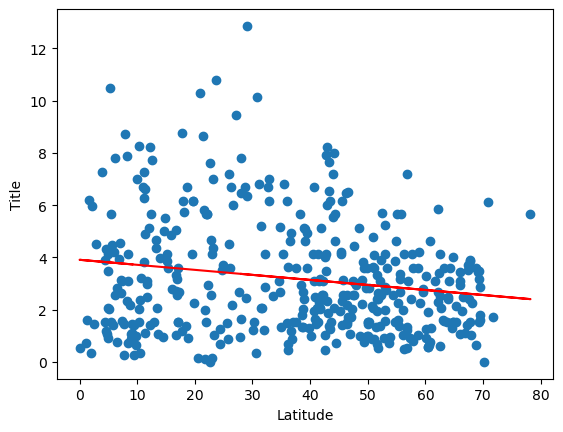

In [25]:
# Northern Hemisphere
x_values = north_hem_df ["Lat"]
y_values = north_hem_df ["Wind Speed"]
Linear_Regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.07165854738607068


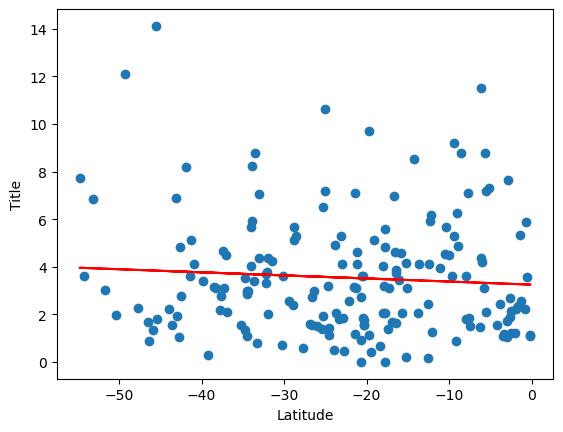

In [26]:
# Southern Hemisphere
x_values = south_hem_df ["Lat"]
y_values = south_hem_df ["Wind Speed"]
Linear_Regression(x_values,y_values, 'Windspeed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE